In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("/kaggle/input/taxi-trips-chicago-2024/Taxi_Trips_-_2024_20240408.csv")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,NaN,NaN,76.0,3.0,...,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,NaN,NaN,8.0,3.0,...,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865242,9e8e52afb83340357ee83796469162c7d8774099,bb277fc77c865565c0fc305dcad0c6b6633e72ce0fcfac...,01/01/2024 12:00:00 AM,01/01/2024 12:00:00 AM,347.0,1.17,NaN,NaN,6.0,7.0,...,0.0,6.25,Cash,Chicago Independents,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
865243,ea3edb137b267a462a73c53fa2e354f60746560e,931225a382fc38a75212f9d358439aec0d9b50fdaf32ad...,01/01/2024 12:00:00 AM,01/01/2024 12:15:00 AM,1193.0,10.58,NaN,NaN,56.0,28.0,...,6.0,38.50,Credit Card,Flash Cab,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
865244,ddcd4d6b7c138bee6841a7800cfbb45f31e6101a,0fdab9be71f6d88e3d3a2e115afc5a33d2bf74153792c5...,01/01/2024 12:00:00 AM,01/01/2024 12:45:00 AM,3059.0,17.44,1.703198e+10,1.703132e+10,76.0,32.0,...,4.0,66.30,Credit Card,City Service,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
865245,bdc420394ce5e864465df0a361dfbe95a4e228c4,389f01c14b097ed951468ff163ccc71ebcb99a27e523e9...,01/01/2024 12:00:00 AM,01/01/2024 12:30:00 AM,1369.0,3.07,NaN,NaN,8.0,24.0,...,1.0,26.00,Mobile,Medallion Leasin,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)


In [5]:
df[['Trip Total','Trip Seconds', 'Trip Miles']]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(df.mean(numeric_only=True))

MSE:  960.6091748960143


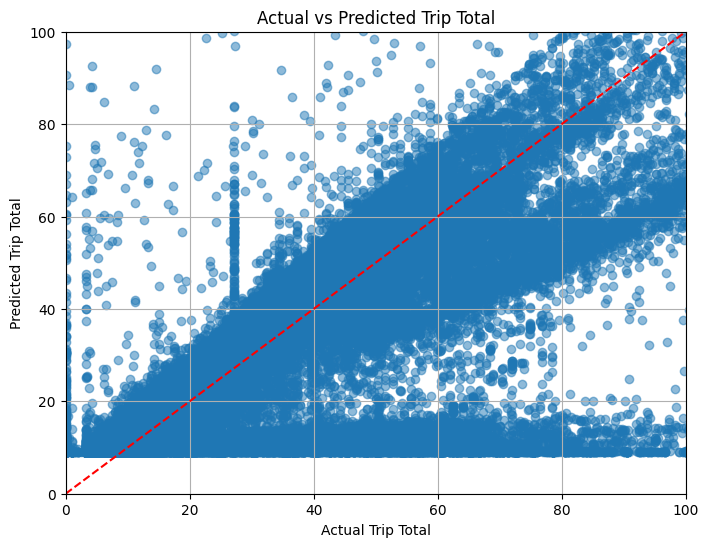

In [7]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
df['Trip Seconds'] = df['Trip Seconds'].fillna(df['Trip Seconds'].mean())
df['Trip Miles'] = df['Trip Miles'].fillna(df['Trip Miles'].mean())
df['Trip Total'] = df['Trip Total'].fillna(df['Trip Total'].mean())
x = df[['Trip Seconds', 'Trip Miles']]
y = df['Trip Total']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("MSE: ", mse(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Trip Total")
plt.ylabel("Predicted Trip Total")
plt.title("Actual vs Predicted Trip Total")


plt.xlim(0, 100)  
plt.ylim(0, 100)  


plt.plot([0, 100], [0, 100], 'r--')

plt.grid(True)
plt.show()
